This notebook parses sgf files generated by the `match` command,
and loads them into a Pandas dataframe.

### Load libraries

In [1]:
import dataclasses
import os
import random
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm
from tqdm.contrib.concurrent import process_map
import pathlib

from go_attack import game_info

In [2]:
MATCH_DIR = "../tests/testdata/visits-truncated/"
# MATCH_DIR = "/nas/ucb/tony/go-attack/matches/visit-exp3"

sgf_paths = game_info.find_sgf_files(MATCH_DIR)
parsed_games = game_info.read_and_parse_all_files(sgf_paths, fast_parse=False)
len(parsed_games)

2

In [3]:
random.seed(42)

In [4]:
%%time
df = pd.DataFrame(parsed_games)
print("gtypes:", df.gtype.unique())
print("Number of cleanup games:", (df.gtype == "cleanuptraining").sum())

# Filter to only normal games
df = df[(df.gtype == "normal")]
print("Fraction continuation:    ", df.is_continuation.mean())
print("Fraction used_initial_pos:", df.used_initial_position.mean())
print("max(init_turn_num)       :", df.init_turn_num.max())

df.head()

gtypes: ['normal']
Number of cleanup games: 0
Fraction continuation:     0.0
Fraction used_initial_pos: 0.0
max(init_turn_num)       : 0
CPU times: user 2.55 ms, sys: 2.35 ms, total: 4.9 ms
Wall time: 4.33 ms


,adv_win,adv_minus_victim_score,board_size,adv_steps,start_turn_idx,komi,adv_komi,handicap,num_moves,ko_rule,...,sgf_line,adv_name,gtype,is_continuation,num_b_pass,num_w_pass,num_adv_pass,num_victim_pass,b_name,w_name
0,False,-162.5,19,0,0,6.5,6.5,0,443,POSITIONAL,...,1,cp63-v1024,normal,False,"(1,)","(23,)","(23,)","(1,)",cp127-v1,victim__cp63-v1024
1,True,18.5,19,0,0,6.5,-6.5,0,296,POSITIONAL,...,1,cp63-v1024,normal,False,"(5,)","(1,)","(5,)","(1,)",cp63-v1024__victim,cp127-v1


### Helper functions

In [5]:
@dataclasses.dataclass
class SGFUrl:
    sgf: str
    text: str

    def sgf_str_to_url(self, sgf_str: str) -> str:
        return f"https://humancompatibleai.github.io/sgf-viewer/#sgf={sgf_str}"

    def __post_init__(self):
        self.url = self.sgf_str_to_url(self.sgf)

    def _repr_html_(self):
        """HTML link to this URL."""
        return f'<a href="{self.url}">{self.text}</a>'

    def __str__(self):
        """Return the underlying string."""
        return self.url

### Analyze data

<AxesSubplot: >

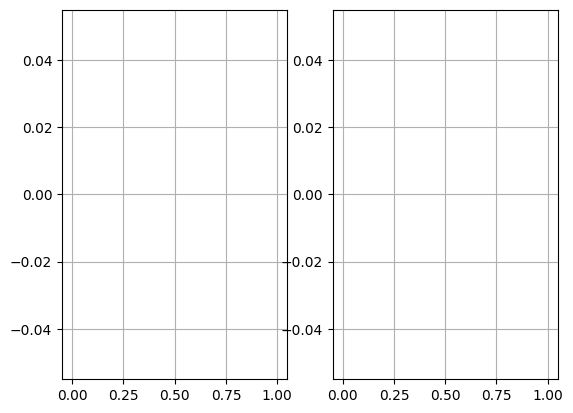

In [6]:
plt.subplot(1, 2, 1)
df[(df.b_name == "cp127-v1__victim") & (df.w_name == "cp63-v1024")].win_color.hist()

plt.subplot(1, 2, 2)
df[(df.w_name == "cp127-v1__victim") & (df.b_name == "cp63-v1024")].win_color.hist()

In [7]:
cur_df = df[df.adv_win == False]
len(cur_df)

1

In [8]:
sgf_path = cur_df.sgf_path.iloc[0]
sgf_line = cur_df.sgf_line.iloc[0]
sgf_str = game_info.get_game_str(pathlib.Path(sgf_path), sgf_line)
SGFUrl(sgf=sgf_str, text="cp63-v1024 beats cp127-v1 (game2)")

SGFUrl(sgf='(;FF[4]GM[1]SZ[19]PB[cp127-v1]PW[victim__cp63-v1024]HA[0]KM[6.5]RU[koPOSITIONALscoreAREAtaxNONEsui1]RE[B+162.5]C[startTurnIdx=0,initTurnNum=0,gameHash=4DE16720CCD90F6968919A180436B50E,gtype=normal,bTimeUsed=6.87643,wTimeUsed=2072.68];B[pp]C[0.44 0.56 0.00 -0.6 v=1];W[cd]C[0.50 0.50 0.00 -0.4 v=1024];B[dp]C[0.42 0.58 0.00 -1.1 v=1];W[pc]C[0.50 0.50 0.00 -0.2 v=1024];B[qe]C[0.42 0.58 0.00 -1.3 v=1];W[ed]C[0.51 0.49 0.00 -0.1 v=1024];B[nd]C[0.41 0.59 0.00 -1.4 v=1];W[pe]C[0.50 0.50 0.00 -0.2 v=1024];B[pd]C[0.42 0.58 0.00 -1.1 v=1];W[od]C[0.52 0.48 0.00 0.7 v=1024];B[qd]C[0.42 0.58 0.00 -0.8 v=1];W[oc]C[0.52 0.48 0.00 0.9 v=1024];B[oe]C[0.42 0.58 0.00 -1.0 v=1];W[pf]C[0.52 0.48 0.00 1.0 v=1024];B[of]C[0.41 0.59 0.00 -1.1 v=1];W[qf]C[0.55 0.45 0.00 2.4 v=1024];B[qc]C[0.45 0.55 0.00 -0.2 v=1];W[nc]C[0.54 0.46 0.00 2.3 v=1024];B[og]C[0.43 0.57 0.00 -0.9 v=1];W[re]C[0.55 0.45 0.00 2.6 v=1024];B[rd]C[0.43 0.57 0.00 -0.9 v=1];W[rg]C[0.56 0.44 0.00 3.0 v=1024];B[se]C[0.42 0.58 0.00 -1.3 v=1];W[rf]C[0.54 0.46 0.00 1.9 v=1024];B[pb]C[0.35 0.65 0.00 -3.8 v=1];W[ob]C[0.50 0.50 0.00 -0.3 v=1024];B[qb]C[0.43 0.57 0.00 -1.2 v=1];W[md]C[0.52 0.48 0.00 1.0 v=1024];B[qh]C[0.41 0.59 0.00 -2.3 v=1];W[rh]C[0.51 0.49 0.00 0.3 v=1024];B[qj]C[0.40 0.60 0.00 -2.4 v=1];W[ph]C[0.53 0.47 0.00 1.1 v=1024];B[pi]C[0.47 0.53 0.00 -0.0 v=1];W[oh]C[0.57 0.43 0.00 4.3 v=1024];B[pg]C[0.33 0.67 0.00 -4.7 v=1];W[qg]C[0.65 0.35 0.00 9.0 v=1024];B[qi]C[0.33 0.67 0.00 -4.2 v=1];W[nh]C[0.89 0.11 0.00 24.9 v=1024];B[fd]C[0.87 0.13 0.00 19.6 v=1];W[ng]C[0.93 0.07 0.00 26.3 v=1024];B[ec]C[0.99 0.01 0.00 25.5 v=1];W[dc]C[0.92 0.08 0.00 26.0 v=1024];B[ee]C[1.00 0.00 0.00 27.0 v=1];W[dd]C[0.92 0.08 0.00 26.0 v=1024];B[qn]C[1.00 0.00 0.00 25.9 v=1];W[fe]C[0.93 0.07 0.00 26.1 v=1024];B[gd]C[1.00 0.00 0.00 27.0 v=1];W[ge]C[0.93 0.07 0.00 26.0 v=1024];B[hd]C[1.00 0.00 0.00 27.0 v=1];W[ef]C[0.93 0.07 0.00 26.1 v=1024];B[he]C[1.00 0.00 0.00 25.0 v=1];W[cq]C[0.93 0.07 0.00 26.0 v=1024];B[dq]C[1.00 0.00 0.00 25.3 v=1];W[cp]C[0.93 0.07 0.00 26.4 v=1024];B[cn]C[0.99 0.01 0.00 23.6 v=1];W[co]C[0.93 0.07 0.00 26.5 v=1024];B[do]C[1.00 0.00 0.00 26.8 v=1];W[bn]C[0.93 0.07 0.00 26.0 v=1024];B[ri]C[1.00 0.00 0.00 25.1 v=1];W[kq]C[0.96 0.04 0.00 29.7 v=1024];B[cm]C[0.99 0.01 0.00 21.5 v=1];W[bm]C[0.96 0.04 0.00 28.6 v=1024];B[cl]C[1.00 0.00 0.00 22.1 v=1];W[nq]C[0.96 0.04 0.00 27.9 v=1024];B[oq]C[1.00 0.00 0.00 22.4 v=1];W[np]C[0.96 0.04 0.00 27.7 v=1024];B[eb]C[1.00 0.00 0.00 21.9 v=1];W[ic]C[0.96 0.04 0.00 28.0 v=1024];B[jd]C[1.00 0.00 0.00 23.1 v=1];W[jc]C[0.96 0.04 0.00 28.8 v=1024];B[kc]C[1.00 0.00 0.00 22.3 v=1];W[kb]C[0.96 0.04 0.00 28.6 v=1024];B[kd]C[1.00 0.00 0.00 22.2 v=1];W[lb]C[0.96 0.04 0.00 28.5 v=1024];B[iq]C[0.99 0.01 0.00 21.3 v=1];W[jo]C[0.96 0.04 0.00 28.2 v=1024];B[ch]C[1.00 0.00 0.00 22.1 v=1];W[hp]C[0.96 0.04 0.00 27.8 v=1024];B[cf]C[0.99 0.01 0.00 21.6 v=1];W[df]C[0.96 0.04 0.00 27.3 v=1024];B[hq]C[0.99 0.01 0.00 21.0 v=1];W[gp]C[0.96 0.04 0.00 27.0 v=1024];B[gq]C[0.99 0.01 0.00 20.0 v=1];W[bl]C[0.96 0.04 0.00 26.7 v=1024];B[gg]C[0.99 0.01 0.00 20.3 v=1];W[pm]C[0.96 0.04 0.00 26.9 v=1024];B[pn]C[0.99 0.01 0.00 17.4 v=1];W[nm]C[0.96 0.04 0.00 28.4 v=1024];B[om]C[0.99 0.01 0.00 18.1 v=1];W[ol]C[0.95 0.05 0.00 30.2 v=1024];B[on]C[0.99 0.01 0.00 21.4 v=1];W[ql]C[0.95 0.05 0.00 30.3 v=1024];B[nl]C[0.99 0.01 0.00 18.0 v=1];W[ok]C[0.93 0.07 0.00 30.0 v=1024];B[ml]C[0.99 0.01 0.00 21.9 v=1];W[nj]C[0.94 0.06 0.00 30.2 v=1024];B[sh]C[1.00 0.00 0.00 22.9 v=1];W[ne]C[0.96 0.04 0.00 29.8 v=1024];B[qm]C[1.00 0.00 0.00 25.3 v=1];W[gb]C[0.96 0.04 0.00 31.4 v=1024];B[hb]C[0.99 0.01 0.00 19.5 v=1];W[ck]C[0.96 0.04 0.00 30.0 v=1024];B[eh]C[1.00 0.00 0.00 24.3 v=1];W[qk]C[0.96 0.04 0.00 30.0 v=1024];B[cb]C[1.00 0.00 0.00 24.2 v=1];W[dg]C[0.96 0.04 0.00 30.9 v=1024];B[dk]C[1.00 0.00 0.00 25.6 v=1];W[db]C[0.96 0.04 0.00 31.6 v=1024];B[da]C[1.00 0.00 0.00 24.1 v=1];W[hc]C[0.96 0.04 0.00 32.3 v=1024];B[gc]C[1.00 0.00 0.00 27.0 v=1];W[fb]C[0.95 0.05 0.00 31.1 v=1024];B[fc]C[1.00 0.0